In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("Uitgebreide_VKM_dataset_cleaned3.csv")

dataframe = df.copy()

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     207 non-null    int64  
 1   name                   207 non-null    object 
 2   shortdescription       207 non-null    object 
 3   description            207 non-null    object 
 4   content                207 non-null    object 
 5   studycredit            207 non-null    int64  
 6   location               207 non-null    object 
 7   contact_id             207 non-null    int64  
 8   level                  207 non-null    object 
 9   learningoutcomes       207 non-null    object 
 10  module_tags            207 non-null    object 
 11  interests_match_score  207 non-null    float64
 12  popularity_score       207 non-null    int64  
 13  estimated_difficulty   207 non-null    int64  
 14  available_spots        207 non-null    int64  
 15  start_

Descriptive Statistics:

        studycredit  interests_match_score  popularity_score  \
mean      21.521739               0.610386        253.618357   
median    15.000000               0.620000        262.000000   
min       15.000000               0.300000         10.000000   
max       30.000000               0.940000        500.000000   
std        7.453953               0.194009        141.167821   

        estimated_difficulty  available_spots  
mean                3.178744        49.743961  
median              3.000000        49.000000  
min                 1.000000        20.000000  
max                 5.000000        80.000000  
std                 1.485180        18.036025  


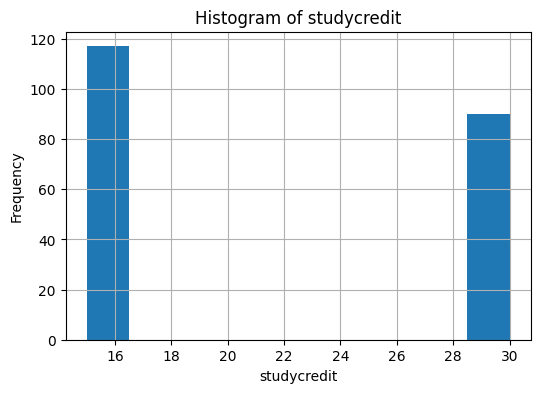

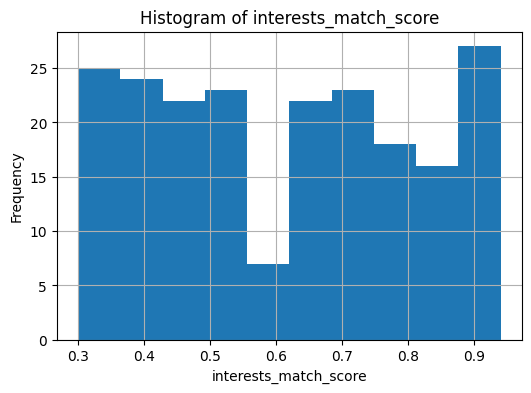

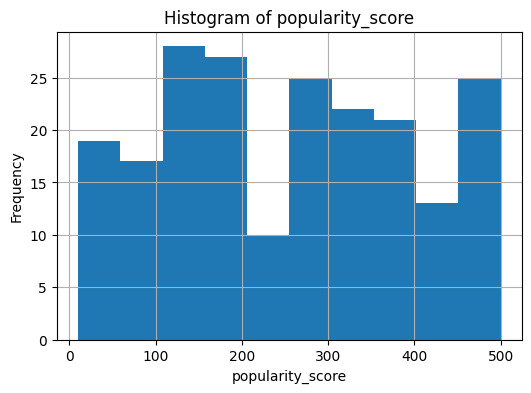

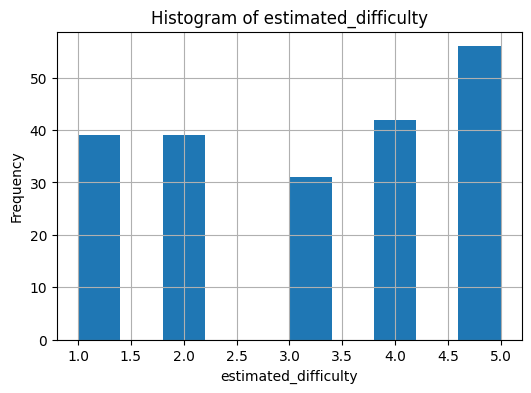

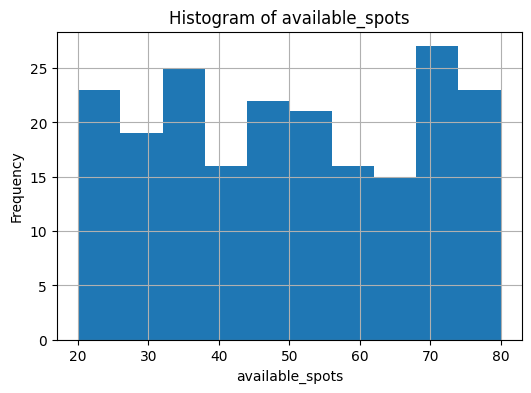

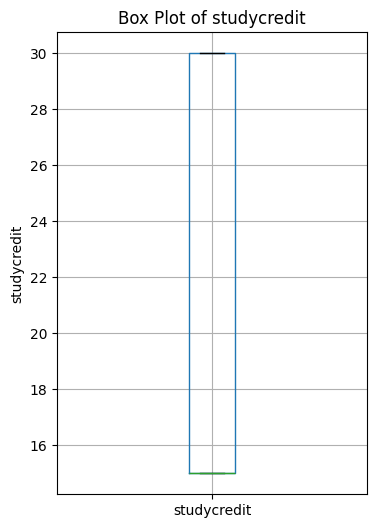

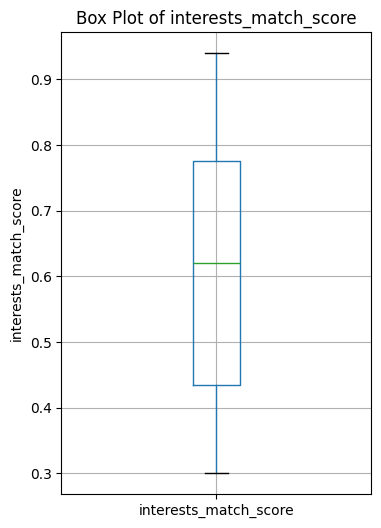

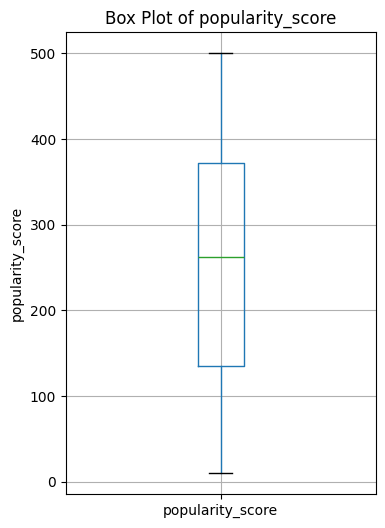

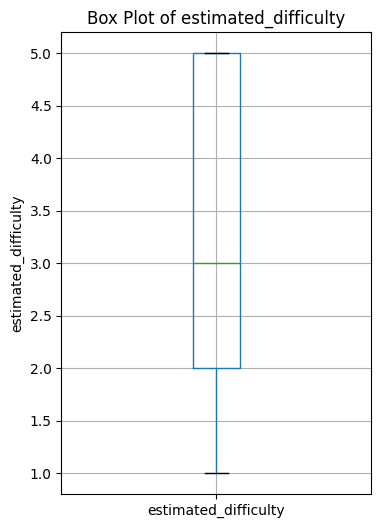

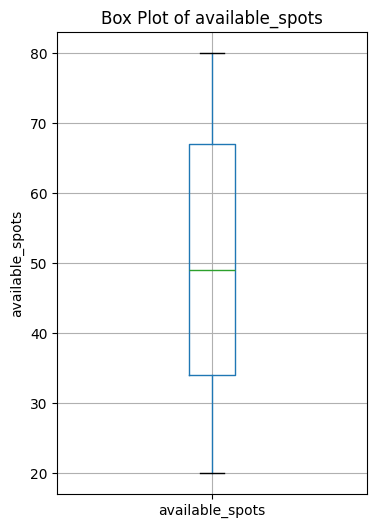

In [6]:
# Columns to analyze
cols = [
    "studycredit",
    "interests_match_score",
    "popularity_score",
    "estimated_difficulty",
    "available_spots"
]

# --- Descriptive Statistics ---
stats = dataframe[cols].agg(['mean', 'median', 'min', 'max', 'std'])
print("Descriptive Statistics:\n")
print(stats)

# --- Histograms ---
for col in cols:
    plt.figure(figsize=(6,4))
    dataframe[col].hist()
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# --- Box Plots ---
for col in cols:
    plt.figure(figsize=(4,6))
    dataframe.boxplot(column=col)
    plt.title(f"Box Plot of {col}")
    plt.ylabel(col)
    plt.show()

In [ ]:
cat_cols = ["shortdescription", "description", "content",
            "location", "level", "learningoutcomes"]

for col in cat_cols:
    dataframe[col] = dataframe[col].astype("category")

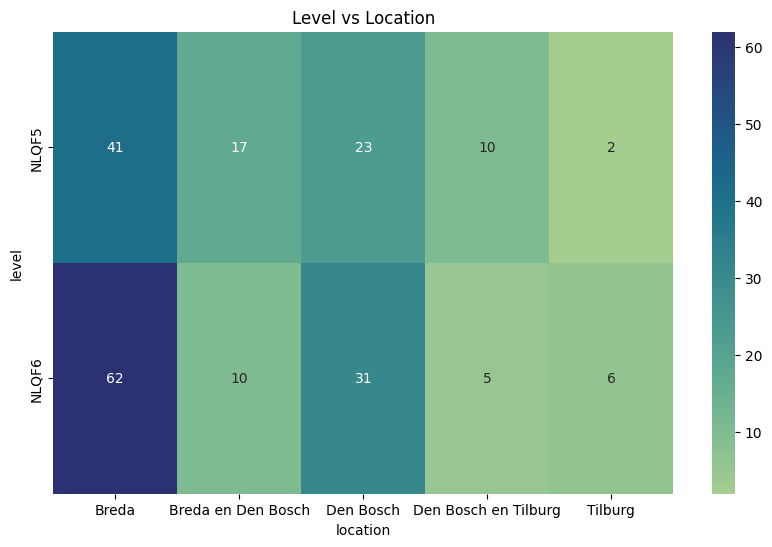

In [22]:
pd.crosstab(dataframe["level"], dataframe["location"])
ct = pd.crosstab(dataframe["level"], dataframe["location"])

plt.figure(figsize=(10, 6))
sns.heatmap(ct, annot=True, fmt="d", cmap="crest")
plt.title("Level vs Location")
plt.show()

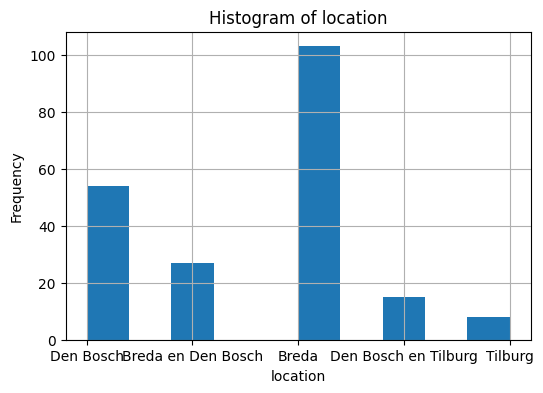

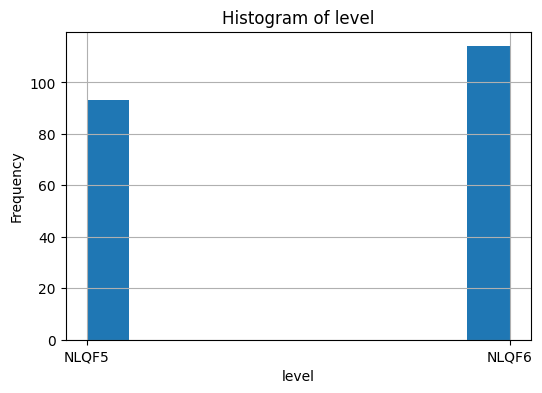

In [28]:
plt.figure(figsize=(6,4))
dataframe['location'].hist()
plt.title(f"Histogram of {'location'}")
plt.xlabel('location')
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6,4))
dataframe['level'].hist()
plt.title(f"Histogram of {'level'}")
plt.xlabel('level')
plt.ylabel("Frequency")
plt.show()